In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Conv2D, Activation,BatchNormalization, MaxPooling2D, Dropout, Flatten
from keras.models import load_model, Sequential
from keras.layers.advanced_activations import LeakyReLU


from tqdm import tqdm
import gc


['test', 'train', 'train.csv', 'sample_submission.csv']


Using TensorFlow backend.


### Read Data

In [2]:
train_img_df = pd.read_csv('../input/train.csv')
train_img_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [3]:
train_img_id = train_img_df.id.str.replace('.jpg','').tolist()

In [4]:
X_train = [np.array(load_img('../input/train/train/{}.jpg'.format(i),target_size=(32,32), grayscale=False))/255 for i in tqdm(train_img_id)]

100%|██████████| 17500/17500 [00:21<00:00, 825.52it/s]


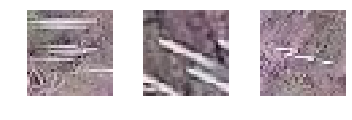

In [5]:
plt.figure(figsize=(5, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [6]:
Y_train = train_img_df.has_cactus
Y_train.unique()

array([1, 0])

In [7]:
test_img_df = pd.read_csv('../input/sample_submission.csv')
test_img_id = test_img_df.id.str.replace('.jpg','').tolist()
X_test = [np.array(load_img('../input/test/test/{}.jpg'.format(i),target_size=(32,32), grayscale=False))/255 for i in tqdm(test_img_id)]

100%|██████████| 4000/4000 [00:04<00:00, 826.78it/s]


In [8]:
test_img_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [9]:
gc.collect()

4714

## Build the Classfication model

In [10]:
model = Sequential()
model.add(Conv2D(64, (5,5), input_shape = (X_train[0].shape[0], X_train[0].shape[1], X_train[0].shape[2]), padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (5,5), padding = 'same'))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =  (2,2)))

model.add(Conv2D(256, (3,3), padding = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyR

In [11]:
# Compile the model
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer='adam')

In [12]:
# Fit the model
model.fit(np.array(X_train), Y_train, epochs = 50, batch_size = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
17500/17500 [==============================] - 13s 753us/step - loss: 0.1871 - acc: 0.9419
Epoch 2/50
17500/17500 [==============================] - 8s 450us/step - loss: 0.0846 - acc: 0.9709
Epoch 3/50
17500/17500 [==============================] - 8s 453us/step - loss: 0.0629 - acc: 0.9783
Epoch 4/50
17500/17500 [==============================] - 8s 454us/step - loss: 0.0431 - acc: 0.9846
Epoch 5/50
17500/17500 [==============================] - 8s 455us/step - loss: 0.0296 - acc: 0.9907
Epoch 6/50
17500/17500 [==============================] - 8s 456us/step - loss: 0.0263 - acc: 0.9919
Epoch 7/50
17500/17500 [==============================] - 8s 456us/step - loss: 0.0196 - acc: 0.9936
Epoch 8/50
17500/17500 [==============================] - 8s 455us/step - loss: 0.0101 - acc: 0.9966
Epoch 9/50
17500/17500 [==============================] - 8s 451us/step - loss: 0.0198 - acc: 0.9938
Epoch 10/50
17500/17500 [=================

In [13]:
predictions = model.predict(np.array(X_test), verbose = 1)

4000/4000 [==============================] - 1s 233us/step


In [14]:
predictions = predictions.round().astype(int)
predictions

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [15]:
for i, pre in enumerate(tqdm(predictions)):
    test_img_df.loc[i, 'has_cactus'] = pre
    

100%|██████████| 4000/4000 [00:02<00:00, 1828.98it/s]


In [16]:
test_img_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1.0
1,0017242f54ececa4512b4d7937d1e21e.jpg,1.0
2,001ee6d8564003107853118ab87df407.jpg,0.0
3,002e175c3c1e060769475f52182583d0.jpg,0.0
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1.0


In [17]:
test_img_df.to_csv('first_submission.csv', index = False)